In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("clean_kaggle_data_2021.csv")
df.sample(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,284,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Q25_Encoded,Q25_buckets
1263,678,18-21,Man,Nigeria,Some college/university study without earning ...,Machine Learning Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"10,000-19,999"
12573,591,40-44,Man,South Africa,Some college/university study without earning ...,Data Engineer,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,2.0,"20,000-29,999"
6308,766,45-49,Man,France,Master’s degree,Machine Learning Engineer,20+ years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,"50,000-59,999"
2830,3537,40-44,Man,China,Master’s degree,Program/Project Manager,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,"90,000-99,999"
13981,841,55-59,Man,Ireland,Doctoral degree,Research Scientist,3-5 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,"40,000-49,999"


In [3]:
df.shape

(15392, 371)

# Data Cleaning

1. Drop the features that are no longer of interest. 'Response time' is not related to target variable. 'Q25' and 'Q25_buckets' are removed because 'Q25_Encoded' can replace them.

In [4]:
features_to_drop = ['Time from Start to Finish (seconds)', 'Q25', 'Q25_buckets']
df.drop(labels=features_to_drop, axis=1, inplace=True)

2. Go through the Question list and drop the question columns that are irelavant to the target variable that we are going to predict later. Questions that okay to be dropped are: Q10, Q22, Q26, Q28, Q33, Q35, Q37A, Q38A, Q39, Q40, Q42.

In [5]:
print(df.columns.get_loc("Q10_Part_1"))
print(df.columns.get_loc("Q10_OTHER"))

33
49


In [6]:
# drop Q10 all columns
q10 = np.array(range(33, 50))
df.drop(df.columns[q10], axis = 1, inplace = True)

In [7]:
df.drop(df.columns[(df.columns.get_loc("Q22"))], axis = 1, inplace = True)
df.drop(df.columns[(df.columns.get_loc("Q28"))], axis = 1, inplace = True)
df.drop(df.columns[(df.columns.get_loc("Q33"))], axis = 1, inplace = True)
df.drop(df.columns[(df.columns.get_loc("Q35"))], axis = 1, inplace = True)

In [8]:
#drop Q37A-Q40
print(df.columns.get_loc("Q37_A_Part_1"))
print(df.columns.get_loc("Q40_OTHER"))

190
231


In [9]:
q37a_40 = np.array(range(190, 232))
df.drop(df.columns[q37a_40], axis = 1, inplace = True)

In [10]:
#drop Q42
print(df.columns.get_loc("Q42_Part_1"))
print(df.columns.get_loc("Q42_OTHER"))

191
202


In [11]:
q42 = np.array(range(191, 203))
df.drop(df.columns[q42], axis = 1, inplace = True)

In [12]:
df.shape

(15392, 293)

3. Drop all the Supplementary Questions. Since all the questions are asking for the 2-years future plan, it is irelavent to the target variable which is the current salary we will be studying.

In [13]:
#drop all questions from Q27B to Q38B
print(df.columns.get_loc("Q27_B_Part_1"))
print(df.columns.get_loc("Q38_B_OTHER"))

191
291


In [14]:
q_supp = np.array(range(191, 292))
df.drop(df.columns[q_supp], axis = 1, inplace = True)

In [15]:
df.shape

(15392, 192)

3. Drop all the columns that contains "OTHER"

In [16]:
df = df[df.columns.drop(list(df.filter(regex='OTHER')))]

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
df.sample(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q20,Q21,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_9,Q32_A_Part_10,Q32_A_Part_11,Q32_A_Part_12,Q32_A_Part_13,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_18,Q32_A_Part_19,Q32_A_Part_20,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_14,Q34_A_Part_15,Q34_A_Part_16,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q41,Q25_Encoded
2882,35-39,Man,Mexico,Some college/university study without earning ...,Data Analyst,1-3 years,Python,NaN,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,A laptop,NVIDIA GPUs,NaN,NaN,NaN,NaN,2-5 times,Matplotlib,Seaborn,Plotly / Plotly Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years,Scikit-learn,TensorFlow,Keras,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linear or Logistic Regression,Decision Trees or Random Forests,NaN,NaN,NaN,NaN,Convolutional Neural Networks,Generative Adversarial Networks,Recurrent Neural Networks,NaN,NaN,NaN,"Image segmentation methods (U-Net, Mask R-CNN,...","Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,NaN,NaN,NaN,"Encoder-decorder models (seq2seq, vanilla tran...",NaN,NaN,NaN,Computers/Technology,0-49 employees,No (we do not use ML methods),Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,$0 ($USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G...",0.0
14968,30-34,Man,India,Master’s degree,Research Scientist,5-10 years,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,C,NaN,NaN,NaN,Visual Studio Code (VSCode),PyCharm,NaN,Notepad++,NaN,NaN,MATLAB,Jupyter Notebook,NaN,A laptop,NaN,NaN,NaN,NaN,None,Never,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manufacturing/Fabrication,"10,000 or more employees",We use ML methods for generating insights

In [19]:
df.shape

(15392, 176)

4. Check the percentage of missing values for the remaining columns

In [20]:
# delete the first row which is the question description
df = df.loc[1:,:]

In [21]:
df.iloc[:,-1].sample(5)

4031     0.0
9374     0.0
525      7.0
14327    0.0
5147     0.0
Name: Q25_Encoded, dtype: float64

In [22]:
percent_missing = df.isnull().sum() * 100 / len(df)
pd.set_option('display.max_rows', None)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=[False], inplace=True)
missing_value_df

,column_name,percent_missing
Q34_A_Part_15,Q34_A_Part_15,99.675135
Q34_A_Part_9,Q34_A_Part_9,99.493210
Q34_A_Part_12,Q34_A_Part_12,99.447729
Q34_A_Part_10,Q34_A_Part_10,99.298291
Q16_Part_14,Q16_Part_14,99.077383
Q27_A_Part_10,Q27_A_Part_10,98.882464
Q7_Part_9,Q7_Part_9,98.875966
Q7_Part_12,Q7_Part_12,98.836983
Q34_A_Part_4,Q34_A_Part_4,98.733026
Q16_Part_6,Q16_Part_6,98.726528


4. Drop all the columns that has missing values more than 80% percent.

There are numerous missing values for some columns by printing out the percentage of missing values for each column. That is mainly due to the nature of the multiple-choice questions that those missing values are the options people did not choose. We will not include the option columns that contain missing values greater than 80% as these answers are minorities and do not provide much information for the prediction. Thus, set up the threshold of 80% and drop all the columns that have missing values that exceed the threshold.

In [23]:
# find all the columns that null values are greater than 80%
def get_nan_cols(df, nan_percent=0.8):
    threshold = len(df.index) * nan_percent
    return [c for c in df.columns if sum(df[c].isnull()) >= threshold] 

col = df[get_nan_cols(df, 0.8)] 

#drop those columns
df.drop(col, axis = 1, inplace = True)

In [24]:
df.shape

(15391, 50)

In [25]:
#check the percentage of missing values for each column
percent_missing = df.isnull().sum() * 100 / len(df)
pd.set_option('display.max_rows', None)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=[False], inplace=True)
missing_value_df

,column_name,percent_missing
Q24_Part_6,Q24_Part_6,79.682932
Q27_A_Part_3,Q27_A_Part_3,79.585472
Q7_Part_2,Q7_Part_2,77.870184
Q14_Part_4,Q14_Part_4,77.259437
Q9_Part_1,Q9_Part_1,77.077513
Q32_A_Part_1,Q32_A_Part_1,76.765642
Q24_Part_4,Q24_Part_4,76.271847
Q27_A_Part_1,Q27_A_Part_1,75.823533
Q24_Part_5,Q24_Part_5,74.472094
Q14_Part_3,Q14_Part_3,73.750893


5. Dealing with categorical data with ordinal records.

Ordinal features are more complicated than features without orders since the order represents the degrees of the category. Thus, we cannot encode categories randomly. 

In [26]:
categorical_variables = ['Q4','Q6','Q13','Q15','Q21','Q26']

In [27]:
#check the number of missing values for ordinal categorical variables
df[categorical_variables].isna().sum()

Q4       0
Q6       0
Q13    961
Q15    961
Q21      0
Q26    208
dtype: int64

In [28]:
# mode of each column can be used to fill missing values
df = df.fillna({i: df.loc[:,i].mode()[0] for i in categorical_variables})

In [29]:
#check the missing values again
df[categorical_variables].isna().sum()

Q4     0
Q6     0
Q13    0
Q15    0
Q21    0
Q26    0
dtype: int64

Use Ordinal Encoder to encode the ordinal categorical columns one by one.

Q4: Education Level

In [30]:
# The answer‘I prefer not to answer’ could be treated as missing values and be replaced by mode.
# The answer'Professional doctorate' is the same degree with Doctoral Degree. So it can be combined into 1 category.
df['Q4'].replace({'I prefer not to answer' : df['Q4'].mode().values}, inplace=True)
df['Q4'].replace({'Professional doctorate' : 'Doctoral degree'}, inplace=True)
df['Q4'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'No formal education past high school',
       'Some college/university study without earning a bachelor’s degree'],
      dtype=object)

In [31]:
from sklearn.preprocessing import OrdinalEncoder

# create the list of unique values of education with the desired order and pass them into the OrdinalEncoder categories
edu = ['No formal education past high school','Some college/university study without earning a bachelor’s degree',
       'Bachelor’s degree', 'Master’s degree', 'Doctoral degree']
OE = OrdinalEncoder(categories = [edu])
df['Q4'] = OE.fit_transform(df['Q4'].values.reshape(-1,1))

In [32]:
df['Q4'].unique()

array([2., 3., 4., 0., 1.])

Q6: Programming Experience

In [33]:
df['Q6'].unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '10-20 years',
       '3-5 years', 'I have never written code'], dtype=object)

In [34]:
prog_exp = ['I have never written code','< 1 years','1-3 years', '3-5 years',
            '5-10 years','10-20 years','20+ years']
OE = OrdinalEncoder(categories = [prog_exp])
df['Q6'] = OE.fit_transform(df['Q6'].values.reshape(-1,1))

In [35]:
df['Q6'].unique()

array([4., 6., 2., 1., 5., 3., 0.])

Q13: Familiarity with TPU

In [36]:
df['Q13'].unique()

array(['2-5 times', 'Never', 'More than 25 times', 'Once', '6-25 times'],
      dtype=object)

In [37]:
tpu = ['Never','Once','2-5 times','6-25 times','More than 25 times']
OE = OrdinalEncoder(categories = [tpu])
df['Q13'] = OE.fit_transform(df['Q13'].values.reshape(-1,1))

In [38]:
df['Q13'].unique()

array([2., 0., 4., 1., 3.])

Q15: Experience in machine learning

In [39]:
df['Q15'].unique()

array(['5-10 years', 'Under 1 year',
       'I do not use machine learning methods', '10-20 years',
       '2-3 years', '1-2 years', '4-5 years', '3-4 years',
       '20 or more years'], dtype=object)

In [40]:
df['Q15'].replace({'I do not use machine learning methods' : df['Q15'].mode().values}, inplace=True)

In [41]:
expml = ['Under 1 year','1-2 years', '2-3 years', '3-4 years', '4-5 years', 
         '5-10 years','10-20 years', '20 or more years']
OE = OrdinalEncoder(categories = [expml])
df['Q15'] = OE.fit_transform(df['Q15'].values.reshape(-1,1))

In [42]:
df['Q15'].unique()

array([5., 0., 6., 2., 1., 4., 3., 7.])

Q21: Size of the Company

In [43]:
df['Q21'].unique()

array(['50-249 employees', '1000-9,999 employees',
       '10,000 or more employees', '0-49 employees', '250-999 employees'],
      dtype=object)

In [44]:
comsize = ['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','10,000 or more employees']
OE = OrdinalEncoder(categories = [comsize])
df['Q21'] = OE.fit_transform(df['Q21'].values.reshape(-1,1))
df['Q21'].unique()

array([1., 3., 4., 0., 2.])

Q25: Investment on machine learning or service

In [45]:
df['Q26'].unique()

array(['$100-$999', '$0 ($USD)', '$1000-$9,999', '$1-$99',
       '$100,000 or more ($USD)', '$10,000-$99,999'], dtype=object)

In [46]:
inves = ['$0 ($USD)', '$1-$99','$100-$999','$1000-$9,999', '$10,000-$99,999', '$100,000 or more ($USD)']
OE = OrdinalEncoder(categories = [inves])
df['Q26'] = OE.fit_transform(df['Q26'].values.reshape(-1,1))
df['Q26'].unique()

array([2., 0., 3., 1., 5., 4.])

6. Fill the missing values with the mode for the remaining categorial features and conduct Label Encoding since the order does not matter in those answers and can be assigned with any number.

In [47]:
Cat_feature_remain = ['Q1','Q2','Q3','Q4','Q5','Q6','Q8','Q11','Q20','Q23','Q41']
df.fillna({c: df.loc[:,c].mode()[0] for c in Cat_feature_remain}, inplace=True)

In [48]:
#conduct label encoding on those columns
for feature in Cat_feature_remain:
    df.loc[:,feature] = df.loc[:,feature].astype('category')
    df.loc[:,feature] = df.loc[:,feature].cat.codes

In [49]:
#check the missing values for all columns again
percent_missing = df.isnull().sum() * 100 / len(df)
pd.set_option('display.max_rows', None)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=[False], inplace=True)
missing_value_df

,column_name,percent_missing
Q24_Part_6,Q24_Part_6,79.682932
Q27_A_Part_3,Q27_A_Part_3,79.585472
Q7_Part_2,Q7_Part_2,77.870184
Q14_Part_4,Q14_Part_4,77.259437
Q9_Part_1,Q9_Part_1,77.077513
Q32_A_Part_1,Q32_A_Part_1,76.765642
Q24_Part_4,Q24_Part_4,76.271847
Q27_A_Part_1,Q27_A_Part_1,75.823533
Q24_Part_5,Q24_Part_5,74.472094
Q14_Part_3,Q14_Part_3,73.750893


7. For the remaining dummy features, fill the NAN with 0 and transform other answers to the value 1. This can be interpreted as 1 means the person selected this option and 0 means the person did not select this option.


In [50]:
#put all the non-dummy columns into a list
categorical_sum = ['Q1','Q2','Q3','Q4','Q5','Q6','Q8','Q11','Q13','Q15','Q20',
                   'Q21','Q23','Q26','Q41','Q25_Encoded']

In [51]:
df[categorical_sum].isna().sum()

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q8             0
Q11            0
Q13            0
Q15            0
Q20            0
Q21            0
Q23            0
Q26            0
Q41            0
Q25_Encoded    0
dtype: int64

In [52]:
#fill the left dummy columns with 0 and 1 if they are not in the categorical_sum list
for col in df.columns:
  if col not in categorical_sum:
    df[col] = df[col].notnull().astype("int")

In [53]:
df.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q8,Q9_Part_1,Q9_Part_4,Q9_Part_5,Q9_Part_11,Q11,Q12_Part_1,Q12_Part_5,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_7,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_7,Q20,Q21,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q26,Q27_A_Part_1,Q27_A_Part_3,Q31_A_Part_9,Q32_A_Part_1,Q34_A_Part_16,Q36_A_Part_7,Q41,Q25_Encoded
1,7,0,23,2,7,4,1,1,0,9,0,0,0,0,2,0,0,2.0,1,1,0,1,5.0,1,1,0,0,0,1,1,1,1,8,1.0,1,0,0,0,0,0,0,2.0,0,1,1,0,1,1,4,2.0
2,7,0,24,3,9,6,0,0,1,9,0,0,0,1,0,0,1,0.0,1,0,0,0,0.0,1,0,0,0,0,1,1,0,0,8,3.0,2,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,6.0
3,1,0,41,3,11,2,1,0,0,9,0,0,1,1,2,0,0,0.0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,0,0,0,0,0,0.0,0,0,0,1,1,1,1,0.0
4,6,0,34,4,10,6,1,0,0,9,0,0,0,1,0,1,0,4.0,1,0,0,0,5.0,1,1,1,0,0,0,0,0,1,0,3.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,4,3.0
5,6,0,23,4,7,1,1,0,0,9,0,0,0,1,0,0,1,0.0,1,1,0,1,6.0,1,0,0,1,0,1,1,1,0,0,1.0,5,1,0,1,0,0,0,3.0,0,0,0,0,0,1,4,3.0


In [54]:
df.shape

(15391, 50)

After finishing the data cleaning process, there are 50 features left to perform feature selection.

# Exploratory Data Analysis and Feature Selection

For this task, one of the way to show feature importance is to plot the correlation of each pair of features in a heatmap. The smaller the absolute value, the weaker the relationship between the two features. It can also be observed by the color of each cell. The darker the red and blue, the stronger the relationship between two features.

We only look at the bottom line since the last line on the y axis represent the target variable. According to the heatmap, Q1 Age, Q3 Country, Q6 coding experience, Q15, Q26 are correlated the most with the target variable "Q25_Encoded".

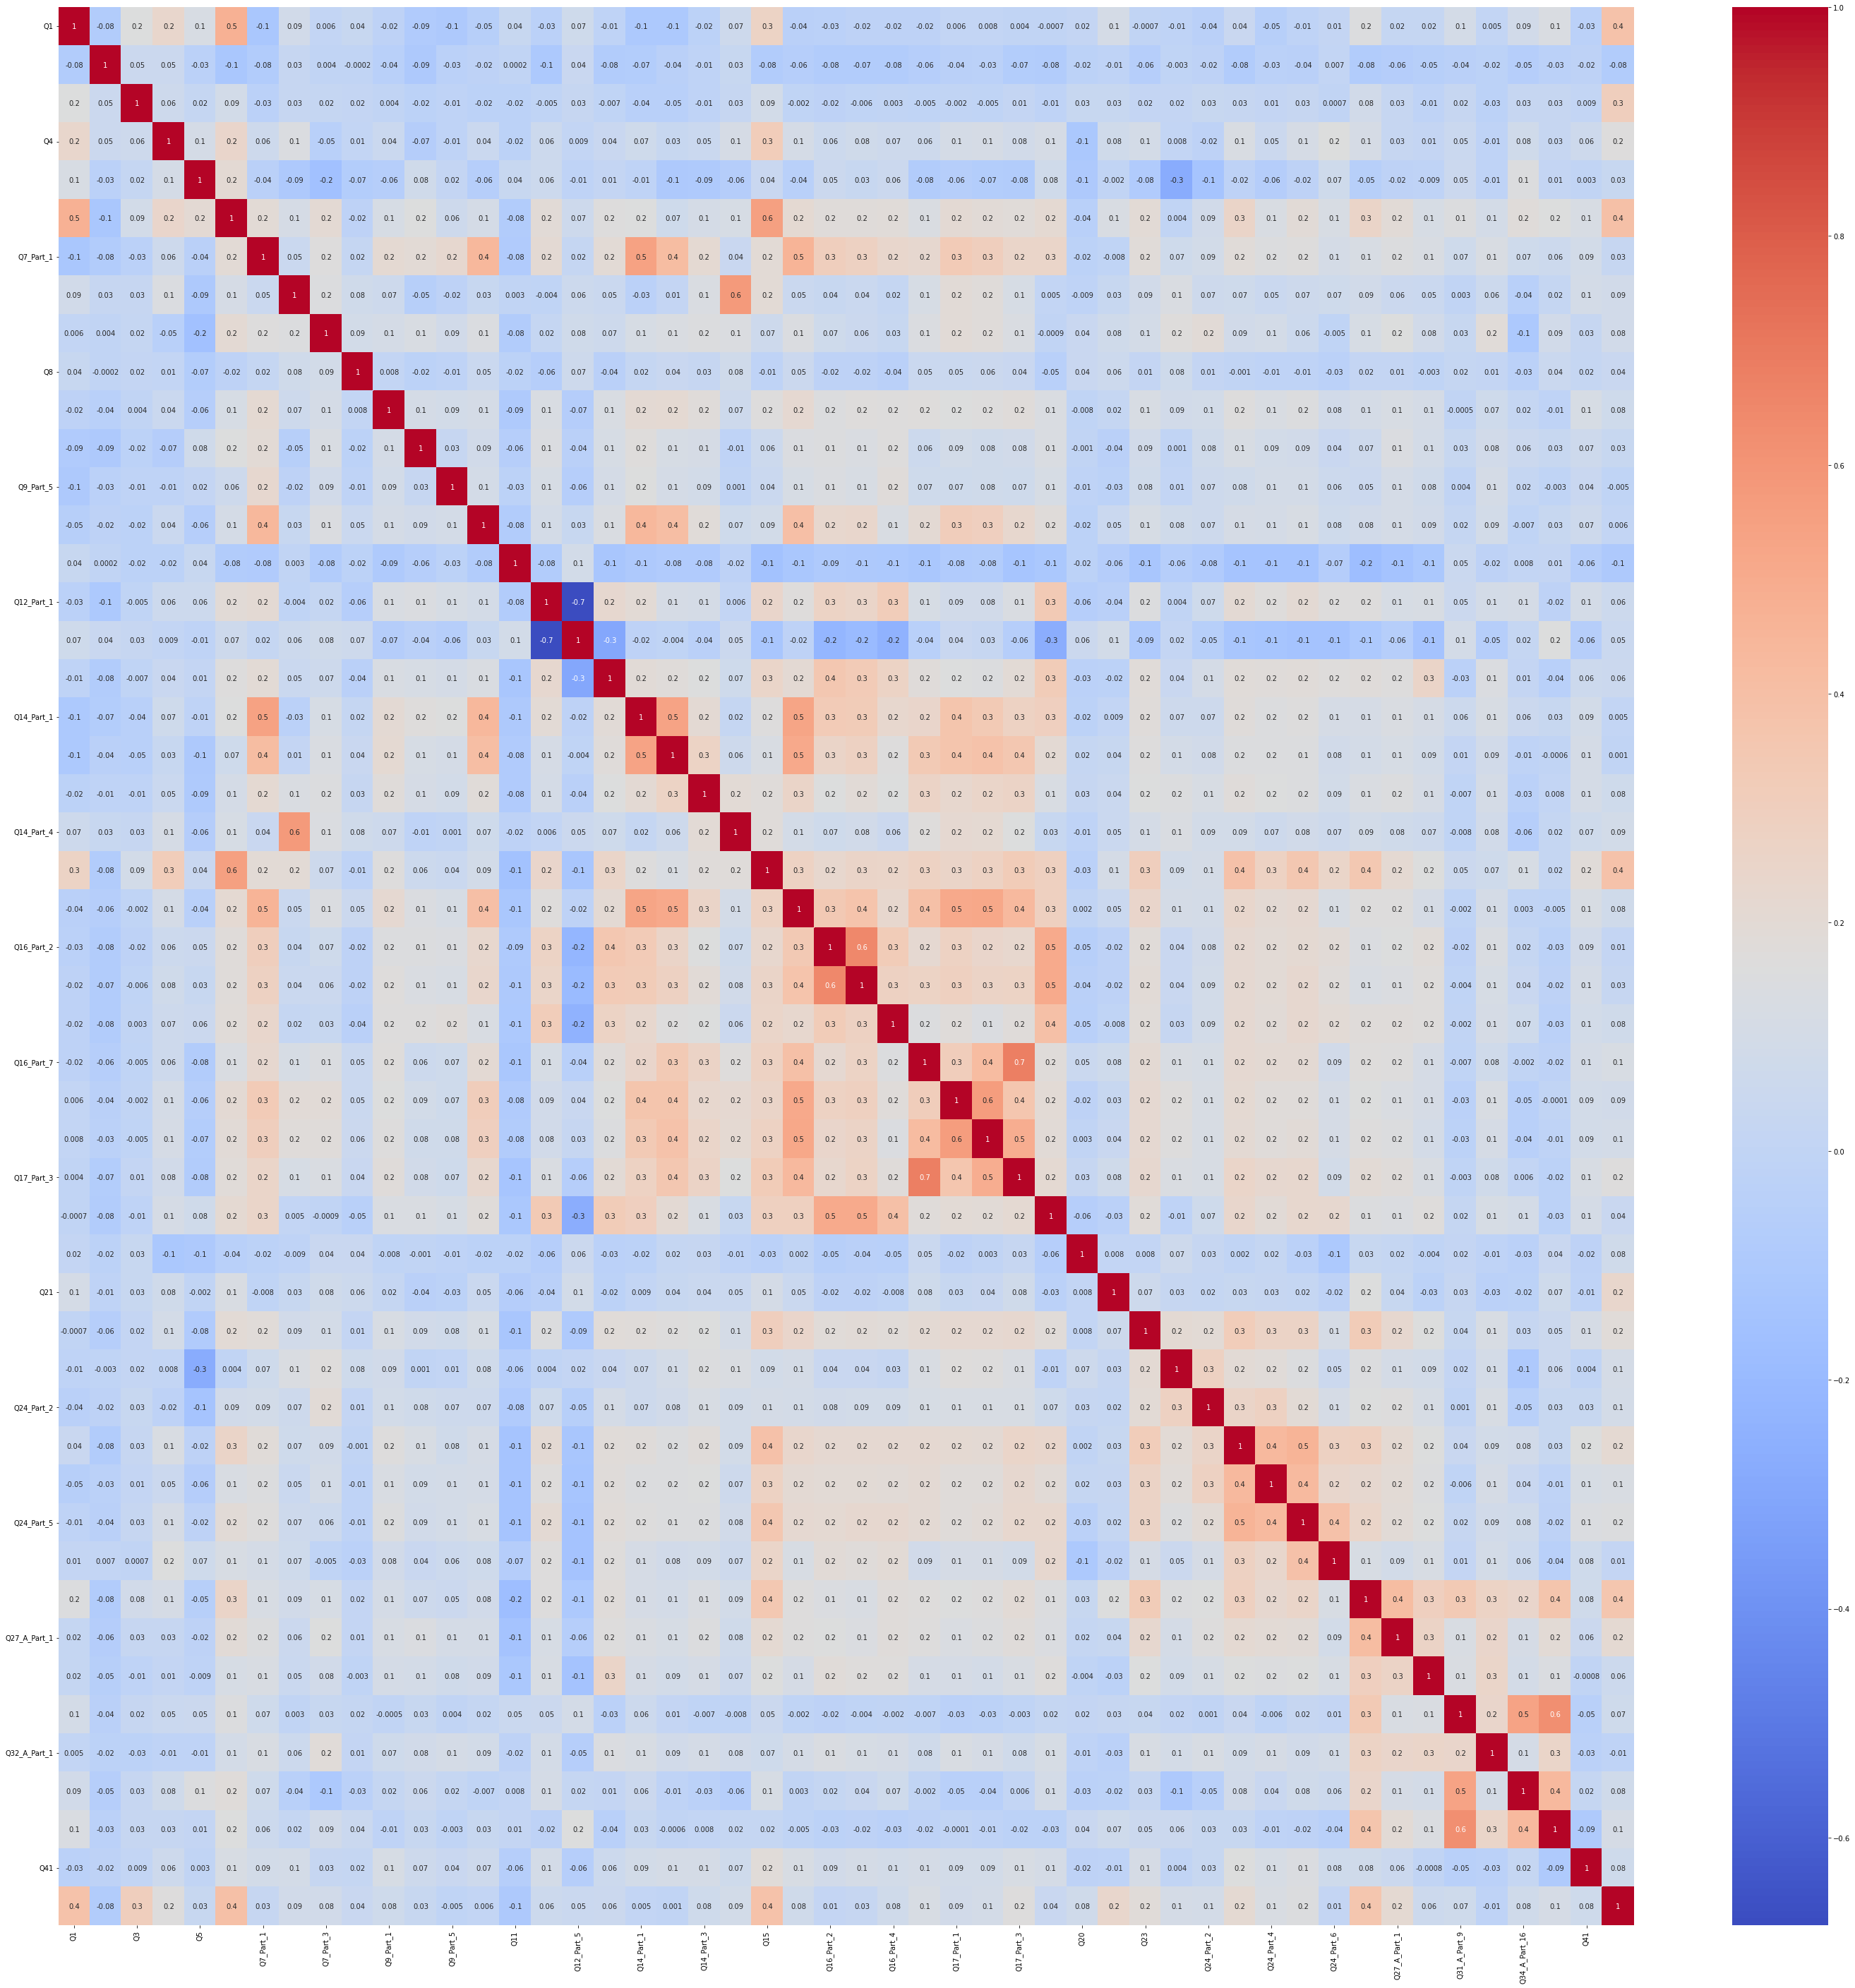

In [55]:
ax = sns.heatmap(df.corr(),annot=True,fmt='.1g',cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(50, 50)
plt.show()

The feature of importance is also shown as a bar chart based on correlation with descending order. Top 5 important features are 'Q6 Coding Experience', 'Q1 Age', 'Q15 Years of coding', 'Q26 Investment in ML', 'Q3 Country'.

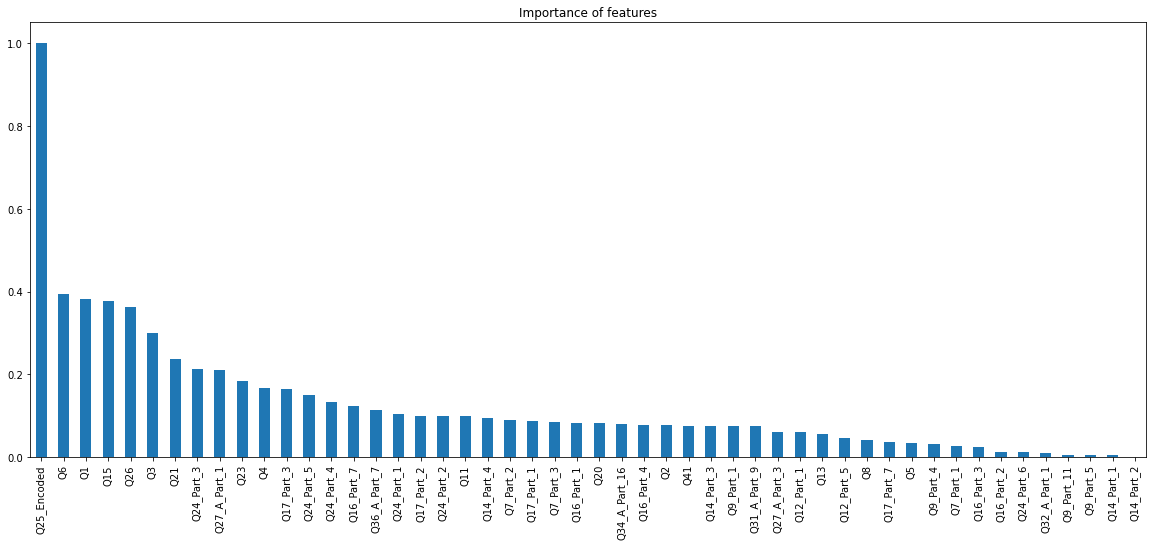

In [56]:
correlation = df.corr().Q25_Encoded.apply(lambda x:abs(x)).sort_values(ascending=False)
ax = (correlation.plot(kind="bar",figsize=(20,8),title="Importance of features"))
plt.show()

**Perform Chi-square to test dependency on each feature and conduct feature selection.**


Many features usually means high dimensionality which tends to cause the following issues in data analysis process:
- Training time will increase dramatically with too many features
- Models will have the risk of overfitting with large number of features.

Performing feature Selection can ease these problems by reducing the dimensions and noisy features without losing much essential information. 
In this assignment, since all features are all categorical after cleaning, we can use Chi-sqaure test to determine whether two variables are dependent or independent with each other. 

Chi-square tests is designed to determine whether the categorical feature is dependent or independent of another variable. In this task, we are going to perform chi-square test on each feature with target variable. If it is independent, then the feature may be irrelevant to the target and can be removed from the dataset.

- Null Hypothesis: the variable is independent with another variable. 
- Alternative Hypothesis: the variable is not independent with another variable. 


In [57]:
#Split test and training set before perfoming feature selection 
from sklearn.model_selection import train_test_split

X = df.drop('Q25_Encoded',axis=1)
y = df['Q25_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [58]:
#Perform chi-square test on the training dataset
from sklearn.feature_selection import chi2

chi_scores = chi2(X_train,y_train)
chi_scores

(array([2.53697870e+03, 3.40162288e+02, 9.92305934e+03, 9.52795651e+01,
        5.43997453e+01, 1.88127150e+03, 4.16385783e+00, 8.56322674e+01,
        4.97270587e+01, 1.61927963e+01, 6.56783485e+01, 2.82812784e+01,
        1.50848105e+01, 8.36158771e+00, 5.41258364e+01, 4.27065307e+01,
        4.12090166e+01, 1.05378652e+02, 1.14621479e+01, 1.33612745e+01,
        6.63556196e+01, 8.86029549e+01, 3.62574983e+03, 4.15183175e+01,
        1.26560612e+01, 1.73583414e+01, 6.00638868e+01, 1.52111153e+02,
        4.49628605e+01, 6.38596322e+01, 2.21313887e+02, 2.01677555e+01,
        6.31542988e+02, 1.07930343e+03, 4.79797431e+02, 4.47933490e+01,
        7.26812070e+01, 3.48611031e+02, 1.76595543e+02, 2.16077657e+02,
        4.81424290e+01, 2.47407697e+03, 4.02557159e+02, 4.32141498e+01,
        8.91258367e+01, 1.90899247e+01, 7.71518858e+01, 1.33173570e+02,
        6.91092935e+01]),
 array([0.00000000e+000, 4.75120806e-064, 0.00000000e+000, 3.78292945e-014,
        1.09740848e-006, 0.0000000

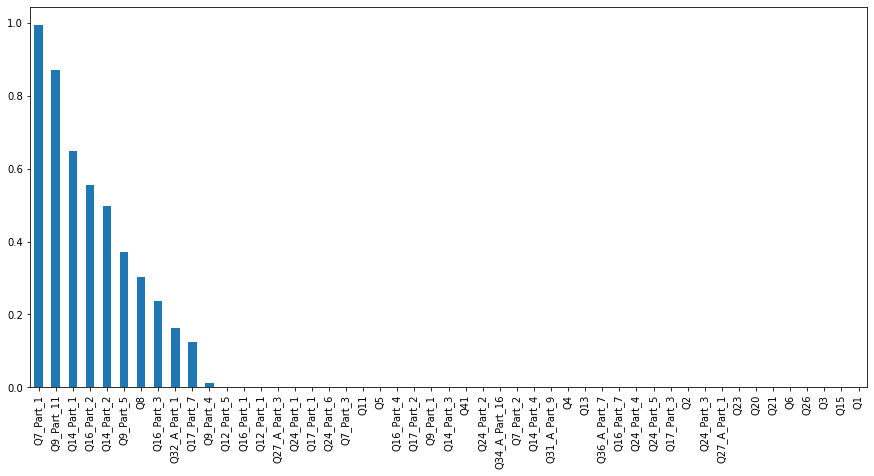

In [59]:
#first array of "chi_scores" represents chi square values and second array represnts p-values
#so we plot p_values in descending orders to find out what features are most irrelavant or independent to the target
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(15,7))
p_values.plot.bar()

For Chi-Square test, if p-value is larger than 0.05 with confidence interval of 0.05, we fail to reject null hypothesis. That means the feature is not statistically significant dependent to the target variable. Thus, we can drop those features. Those are: Q7_Part_1, Q9_Part_11, Q14_Part_1, Q16_Part_2, Q9_Part_5.

In [60]:
# drop those columns on both traing set and test set
X_train = X_train.drop(['Q7_Part_1', 'Q9_Part_11', 'Q14_Part_1', 'Q16_Part_2', 'Q9_Part_5'],axis=1)
X_test = X_test.drop(['Q7_Part_1', 'Q9_Part_11', 'Q14_Part_1', 'Q16_Part_2', 'Q9_Part_5'],axis=1)

In [61]:
X_train.shape

(10773, 44)

In [62]:
X_train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7_Part_2', 'Q7_Part_3', 'Q8',
       'Q9_Part_1', 'Q9_Part_4', 'Q11', 'Q12_Part_1', 'Q12_Part_5', 'Q13',
       'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q15', 'Q16_Part_1',
       'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_7', 'Q17_Part_1', 'Q17_Part_2',
       'Q17_Part_3', 'Q17_Part_7', 'Q20', 'Q21', 'Q23', 'Q24_Part_1',
       'Q24_Part_2', 'Q24_Part_3', 'Q24_Part_4', 'Q24_Part_5', 'Q24_Part_6',
       'Q26', 'Q27_A_Part_1', 'Q27_A_Part_3', 'Q31_A_Part_9', 'Q32_A_Part_1',
       'Q34_A_Part_16', 'Q36_A_Part_7', 'Q41'],
      dtype='object')

## Model Implementation

Since the target variable has 15 classes and they are ordinal, we cannot use normal Logistic Regression directly with the parameter "One-vs-Rest". Instead, binary classifications for multiple times should be used to predict ordinal multiclass targets. And 10 folds cross-validations are implemented to check the mean accuracy of the model performance on the training set.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

model = LogisticRegression(max_iter= 1000)

The function below is designed to output the probability of belonging to each of the salary buckets. For each iteration, the algorithm divides the 15 classes into 2 classes and labels them as 0 and 1. Starting with class 0, it is treated as label 0 and the rest as 1 to make binary predictions. Then every time for the next iteration, use the probability of this group of classes to subtract the group probability from the last iteration to get the single probability for that specific class. For class 14, get the probability directly by extracting it from label 1 in the binary classifier. Then we get the array of probabilities for each class from all the samples with dimension (len(x), 15).

In [86]:
def predict_prob_class (X, Y, X_1, model):
    y_new = []
    p_0 = 0
    p_all_class = []
    
    #for the first 14 classes
    for cla in range(0, 14):
      y_new = []
      #loop over each row in y and update the cell value to 0 or 1
      for i in Y:
        y_new.append(0 if i <= cla else 1)
      model.fit(X, y_new)
      #predict probability on the test set and extract the first column of result
      p_pred = model.predict_proba(X_1)[:,0]
      #subtract the group probability from last iteration to get the single probablity
      p_per_class = p_pred - p_0 
      p_all_class.append(p_per_class)
      #set the p_0 to be the new group probability
      p_0 = p_pred

    # for class 14, instead of doing the subtraction, extract the last probability directly
    y_new = []
    for i in Y:
        y_new.append(0 if i <= 13 else 1)
    model.fit(X, y_new)
    p_pred_14 = model.predict_proba(X_1)[:,1]
    p_all_class.append(p_pred_14)
    
    #for each row, the index of the max of 15 probabilities is the predicted class
    pred_class = np.argmax(p_all_class, axis = 0)

    return pred_class


To perform the cross-validation and calcualte the accuracy, set aside the test dataset and split the training set into new training and validation set. Standardization is necessary because scaling inputs helps to avoid the situation where some features dominate others in magnitude. Since there are ordinal data in some columns, standardization is necessary and should be performed separately on the training and validation set. The accuracy scores across all folds are pretty similar and the average accuracy score is 46.49%.

In [87]:
#calculate accuracy across folds
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter = 1000)
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)

accuracy_list = np.zeros(10)
np_idx = 0

#perform 10 fold cross validation 
for train_idx, val_idx in kfold.split(X_train): #split the training set into new train and validation set
    X_tra, X_val = X_train.values[train_idx], X_train.values[val_idx]
    y_tra, y_val = y_train.values[train_idx], y_train.values[val_idx]
    
    #scale the dataset seperately
    X_tra = scaler.fit_transform(X_tra)
    X_val = scaler.fit_transform(X_val)
    
    #call the function to predict the probabilities for 15 classes
    pred_class = predict_prob_class(X_tra, y_tra, X_val, model)

    #the index of the max of 15 probabilities is the predicted class
    acc = accuracy_score(pred_class, y_val)

    accuracy_list[np_idx] = acc*100
    np_idx +=1

    print("Fold {}: Accuracy: {}%".format(np_idx, round(acc*100,3))) 

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy_list),3),round(np.std(accuracy_list),3)))

Fold 1: Accuracy: 45.547%
Fold 2: Accuracy: 46.289%
Fold 3: Accuracy: 46.753%
Fold 4: Accuracy: 47.725%
Fold 5: Accuracy: 45.404%
Fold 6: Accuracy: 46.611%
Fold 7: Accuracy: 47.168%
Fold 8: Accuracy: 46.24%
Fold 9: Accuracy: 46.89%
Fold 10: Accuracy: 46.24%
Average Score: 46.487%(0.668%)


**Bias-Variance Tradeoff and choose the best parameter**

Bias is the difference between the average prediction of the model and the correct value. Variance is the variability of model prediction for a given data point. For this task, hyperparameter C (inverse of regularization strength) is chosen to form different models. This is an important hyperparameter because it controls whether the model is too complex to generalize or too simple to capture important patterns in the dataset. 
When the model has a small C, the regularization is very 
strong and it penalizes largely on large weights thus, making the model as simple as possible. So, the model has small variance and large bias, however, this tends to make the model underfitting. When C gets bigger, the penalty on large weights of features becomes smaller, variance increases, and bias decreases. Therefore, the model tends to get more complex but may lead to overfitting. 

In order to prevent underfitting and overfitting, we need to choose an appropriate c that minimizes the sum of bias and variance.


In [66]:
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)

#set the parameter list
C = [0.001,0.01,0.1,1,10,100]
for c in C: 
  model = LogisticRegression(C=c, max_iter= 1000)
  np_idx = 0
  accuracy_list = np.zeros(10)
  for train_idx, val_idx in kfold.split(X_train):
    X_tra, X_val = X_train.values[train_idx], X_train.values[val_idx]
    y_tra, y_val = y_train.values[train_idx], y_train.values[val_idx]

    #scale the dataset seperately
    X_tra = scaler.fit_transform(X_tra)
    X_val = scaler.fit_transform(X_val)

    #call the function to predict the probabilities
    p_all_class = predict_prob_class(X_tra, y_tra, X_val, model)

    #the index of the max of 15 probabilities is the predicted class
    pred_class = np.argmax(p_all_class, axis = 0)
    acc = accuracy_score(pred_class, y_val)

    accuracy_list[np_idx] = acc*100
    np_idx +=1
    
  print ("c = {}, Average Score: {}%".format(c, round(np.mean(accuracy_list),3)))

c = 0.001, Average Score: 46.654%
c = 0.01, Average Score: 46.737%
c = 0.1, Average Score: 46.542%
c = 1, Average Score: 46.487%
c = 10, Average Score: 46.468%
c = 100, Average Score: 46.45%


When c = 0.01, the model has the highest average accuracy score 46.737%.

# Part 4: Model Tuning

The hyperparameters include: 
- 'penalty', 'dual', 'tol', 'C', 'fit_intercept', 'intercept_scaling', 'class_weight', 'random_state', 'solver', 'max_iter', 'multi_class', 'verbose', 'warm_start', 'n_jobs', 'L1_ratio'. Setting L1_ratio=0 is equivalent to using penalty='L2', while setting L1_ratio=1 is equivalent to using penalty='L1'. 

For this part, two hyperparameters being choosed are:
- C: is inverse of regularization strength
- Solver: Algorithm to use in the optimization problem. {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}

Due to the ordinal multiple class problem we are dealing with, we cannot implement GridSearchCV directly as it fits the data using the default Logistic Regression model. As an alternative, we can mimic the logic from GridSearchCV by looping the two sets of parameters and passing through cross-validation to find the best parameter that gives the best evaluation score. Since the dataset is imbalanced (class 0 accounts for 45% of data), accuracy score is not a good metric to evaluate the model. Instead, F1 score can be used to evaluate the model performance.

In [91]:
from sklearn.metrics import f1_score

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
kfold.get_n_splits(X)

best_model = model
best_params = {}
best_accuracy = 0

for C in [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]:
    for solver in ['newton-cg','liblinear','sag']:
      model = LogisticRegression(C=C, solver=solver, max_iter= 1000)
      accuracy = np.zeros(10)
      np_idx = 0

      for train_idx, val_idx in kfold.split(X_train):
        X_tra, X_val = X_train.values[train_idx], X_train.values[val_idx]
        y_tra, y_val = y_train.values[train_idx], y_train.values[val_idx]
       
       #scale the dataset seperately
        X_tra = scaler.fit_transform(X_tra)
        X_val = scaler.fit_transform(X_val)

        #call function to predict the probability
        pred_class = predict_prob_class(X_tra, y_tra, X_val, model)
        f1_sco= f1_score(pred_class, y_val, average='micro')
        accuracy_list[np_idx] = f1_sco*100
        np_idx +=1

      #store the best accuracy by comparing each pair of parameter values
      if np.mean(accuracy_list) > best_accuracy:
        best_model = model
        #update the model parameters
        best_params = {'C':C, 'solver':solver}
        best_accuracy = np.mean(accuracy_list)
    print("c=" + str(C))
print (best_params)
print ("Best Score: {}%".format(round(best_accuracy,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}%".
       format(best_params['C'],best_params['solver'],round(best_accuracy,3)))

c=0.001
c=0.01
c=0.05
c=0.1
c=0.5
c=1
c=5
c=10
{'C': 0.01, 'solver': 'newton-cg'}
Best Score: 46.672%

The optimal log model uses C=0.01, and a newton-cg solver, and has a cross validation score of 46.672%


In [68]:
#make prediction on the train dataset using the best parameters
model = LogisticRegression(C = 0.01, solver = 'newton-cg', max_iter = 3000)
#call the function to make the predictions
pred_class_fea_imp = predict_prob_class (X_train, y_train, X_train, model)

X_train_importance = X_train.copy()
#add prediction classes to the X train dataframe
X_train_importance['predic_featureimport']= pred_class_fea_imp

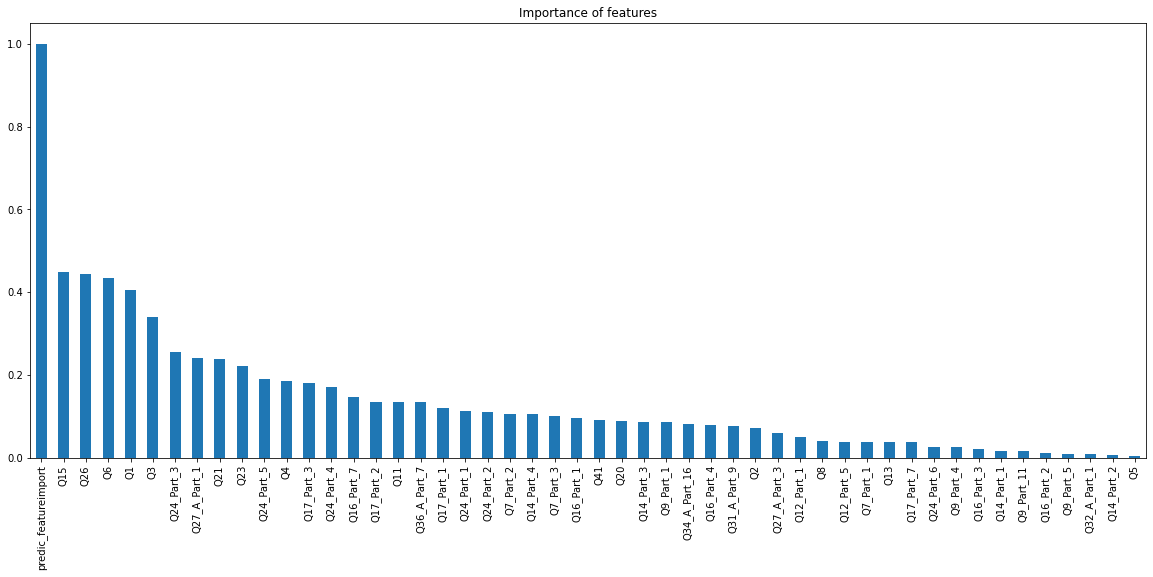

In [69]:
# Plot the feature importance again based on the correlation with predicted class of target variable
correlation = X_train_importance.corr().predic_featureimport.apply(lambda x:abs(x)).sort_values(ascending=False)
ax = (correlation.plot(kind="bar",figsize=(20,8),title="Importance of features"))
plt.show()

Difference: Overall the importance does not have a big change. Feature Q15, Q26 increased their importance to the top 2. That means in the best model, those two features have the most prediction power.

# Testing & Discussion 

In [70]:
#make prediction on the test set using the best model
model = LogisticRegression(C = 0.01, solver = 'newton-cg', max_iter = 3000)
predic_test = predict_prob_class (X_train, y_train, X_test, model)
f1_score_= f1_score(predic_test, y_test, average='micro')*100
print ("Testing F1 Score: {}%".format(round(f1_score_,3)))   

Testing F1 Score: 46.016%


- Model Performance on training set is: 46.524%.
- Model Performance on test set: 46.016%

To determine if the model if overfitting or underfitting, plot the accuracy for training vs validation set with different parameter values. 

In [93]:
# To plot the train accuracy vs validation accuracy graph, store the accuracies for each c value in a dataframe.
result_list = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
kfold.get_n_splits(X)

param_c = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
for C in param_c:
  model = LogisticRegression(C=C, solver = 'newton-cg', max_iter= 100)
  accuracy_list_train = np.zeros(10)
  accuracy_list_val = np.zeros(10)
  np_idx = 0

  #perform 10 fold cross validation
  for train_idx, val_idx in kfold.split(X_train):
    X_tra, X_val = X_train.values[train_idx], X_train.values[val_idx]
    y_tra, y_val = y_train.values[train_idx], y_train.values[val_idx]

    #scale the dataset seperately
    X_tra = scaler.fit_transform(X_tra)
    X_val = scaler.fit_transform(X_val)

    #call the function to predict the probability on train and validation set respecively
    predic_train = predict_prob_class(X_tra, y_tra, X_tra, model)
    predic_val = predict_prob_class(X_tra, y_tra, X_val, model)

    #calcularte F1 score in each fold for train and validation, and store the results in the lists
    f1_score_train = f1_score(predic_train, y_tra, average='micro')
    accuracy_list_train[np_idx] = f1_score_train
    f1_score_val = f1_score(predic_val, y_val, average='micro')
    accuracy_list_val[np_idx] = f1_score_val

    np_idx +=1

  # take the average of accuracy for both train and validation for each iteration
  mean_train = np.mean(accuracy_list_train)
  mean_val = np.mean(accuracy_list_val)
  result_list.append((C, mean_train, mean_val))

# Make a dataframe of the results
result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "val_accuracy"])

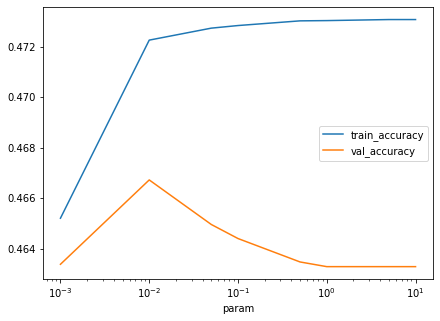

In [94]:
# plot the train and validation accuracy for the different parameters c to determine if the model is overfitting or underfitting
result_df.plot(x="param", y=["train_accuracy", "val_accuracy"], logx=True, figsize=(7,5))

It can be seen that the best parameter is chosen before the accuracy drops on the validation set. The graph seems to indicate that the model is neither overfitting nor underfitting. However, given the fact that the model has low accuracy score on both training data and test data, it is highly likely the model is underfitting which means the algorithm used to build the prediction model is very simple and not able to learn the complex pattern from the training data.

**Distribution of Predictions and Targets**

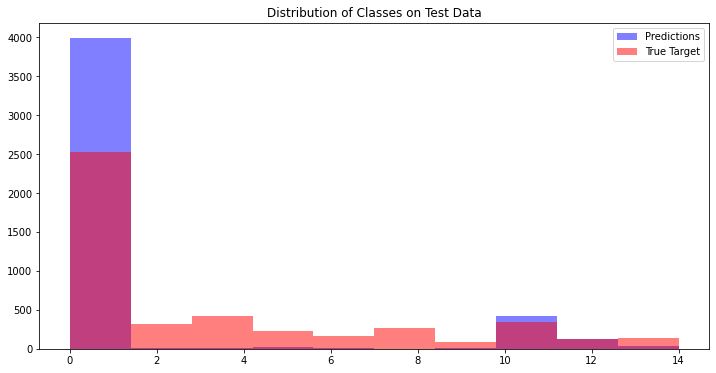

In [95]:
plt.figure(figsize=(12,6))
plt.hist(predic_test,label='Predictions',color="b", alpha=0.5)
plt.hist(y_test,label='True Target',color="r", alpha=0.5)
plt.title('Distribution of Classes on Test Data')
plt.legend()
plt.show()


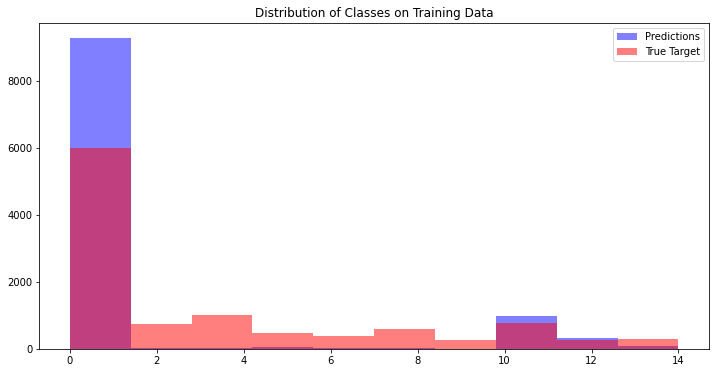

In [96]:
plt.figure(figsize=(12,6))
plt.hist(pred_class_fea_imp,label='Predictions',color="b", alpha=0.5)
plt.hist(y_train,label='True Target',color="r", alpha=0.5)
plt.title('Distribution of Classes on Training Data')
plt.legend()
plt.show()

Insights from the distribution of predictions and targets: observations spread across all the classes in true target data, however, observable predictions only occur in classes 0, 10, and 12. There is little to no prediction in other classes. The same trend of distribution can be obtained for both the training and testing dataset. That’s probably because most of the predictions are on class 0 since class 0 has the greatest number of observations (45%) in the entire dataset and the model may get bias from class 0 and make unsatisfying predictions on other classes. 

In [97]:
print(len(df[df["Q25_Encoded"]==0])/len(df))

0.4548112533298681


**Options to Increase Accuracy:**

For ordinal classification problems, it is important to have balanced data representing each class. 
- Re-sampling dataset can be implemented: remove samples from over-represented classes. 

- Use stronger algorithms could also help increase accuracy for multi-class classification such as Random Forest, Gradient Boosting which combines the weak learners to form a strong learner, where a weak learner defines a classifier slightly correlated with the actual classification.